In [212]:
!pip install -U kaleido

In [213]:
#Importing the libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [214]:
#read files with labels
data = pd.read_csv('https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/conversion-rate-challenge-ft/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [215]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [216]:
#Explore dataset
#Creating a sample of 10000
data_sample = data.sample(10000)

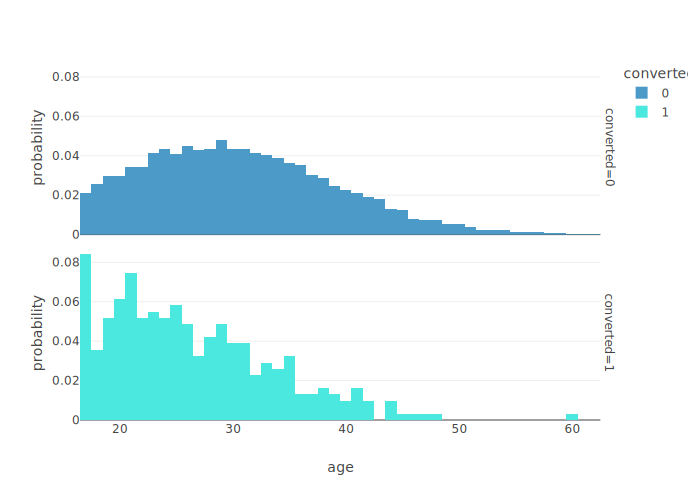

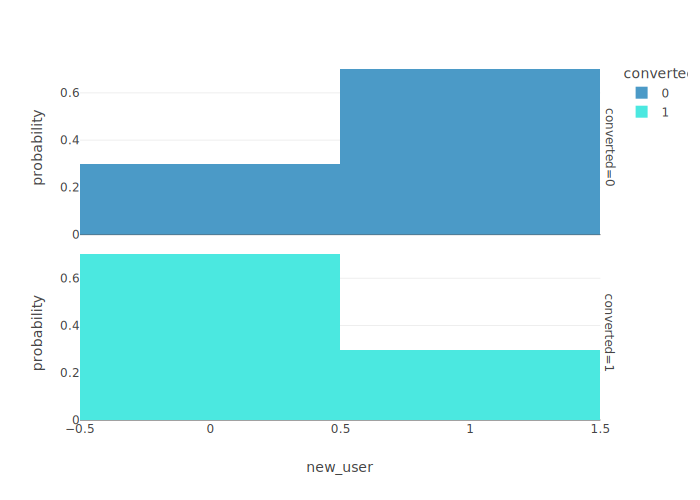

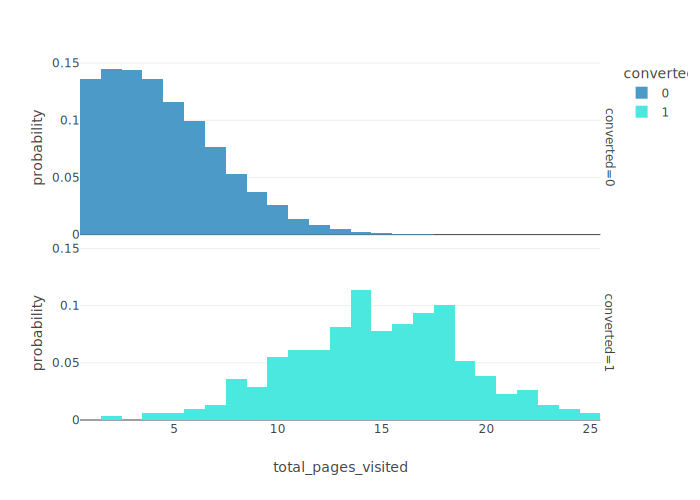

In [217]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['age', 'new_user',	'total_pages_visited']
for f in num_features:
    fig = px.histogram(data_sample, f, color = 'converted', facet_row = 'converted', histnorm = 'probability')
    fig.show()

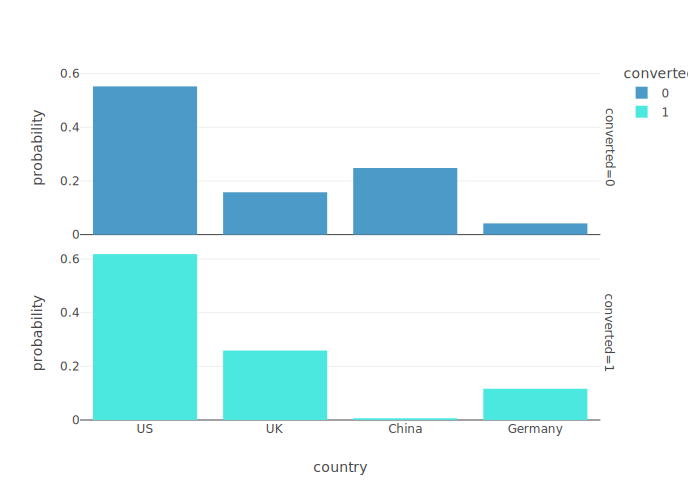

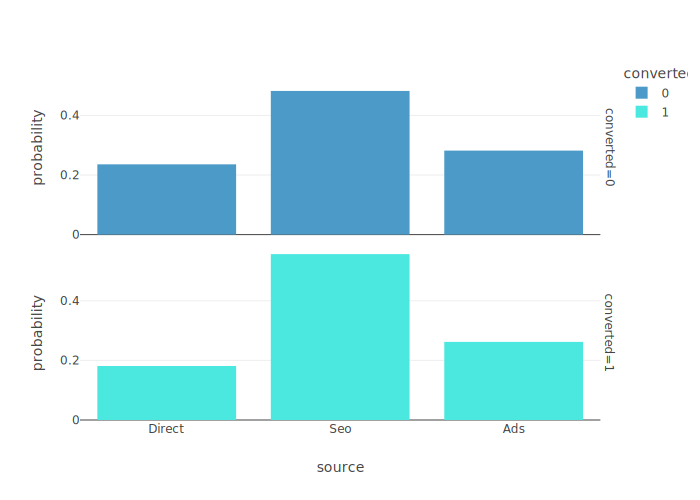

In [218]:
# Univariate analysis
# Distribution of each qualitative variable
cat_features = ['country', 'source']
for f in cat_features:
    fig = px.histogram(data_sample, f, color = 'converted', facet_row = 'converted', histnorm = 'probability')
    fig.show()

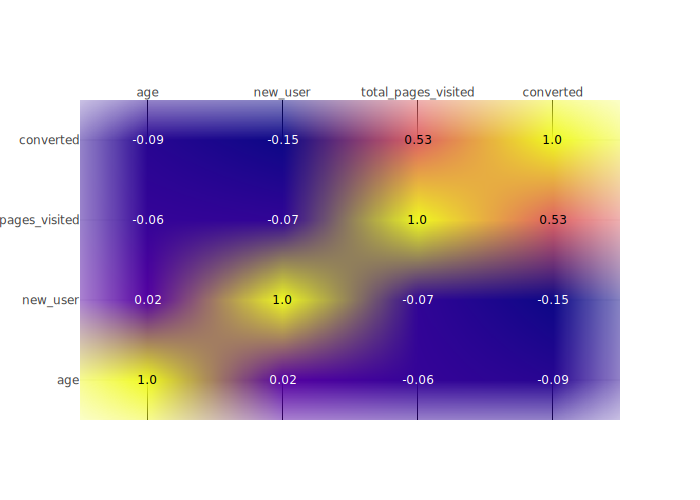

In [219]:
#Correlation matrix of numrical features
corr_matrix = data_sample.corr(numeric_only=True).round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

In [220]:
#univariate logistic regression
#Choosing the 'total_pages_visites' variable to use in the model, and create train and test sets

features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [221]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [222]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [223]:
#Training pipelines

# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [224]:
# Train model
print("Train model...")
classifier = LogisticRegression() #
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [225]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [226]:
#Test pipeline

# Use X_test, and the same preprocessings as in training pipeline,
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [227]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [228]:
#Performance assement

# Calculate the f1-score will be used to assess the performances
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))


f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


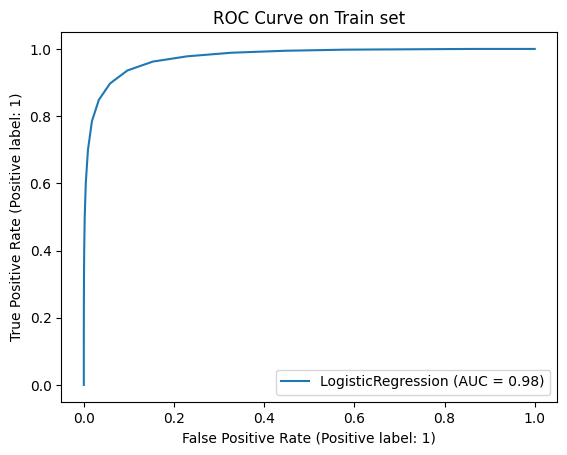

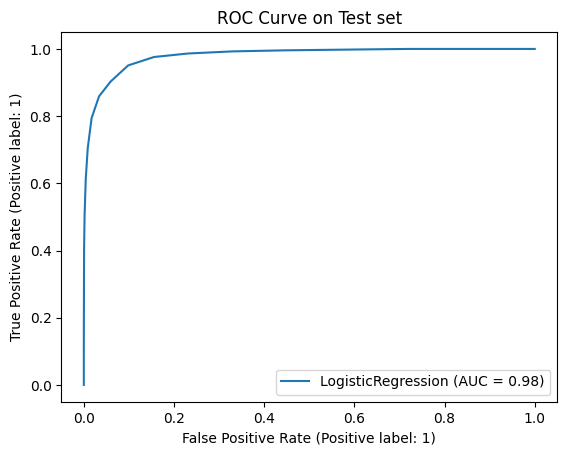

In [229]:
# Visualize ROC curves
_ , ax = plt.subplots()
ax.set(title="ROC Curve on Train set")
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

_ , ax = plt.subplots()
ax.set(title="ROC Curve on Test set")
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

In [232]:
#Multivariate analysis
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = 'converted'

X = data_sample.drop(target_variable, axis = 1)
Y = data_sample.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
1476      0
218539    0
63713     0
135434    0
281281    0
Name: converted, dtype: int64

X :
       country  age  new_user  source  total_pages_visited
1476        US   23         0  Direct                    7
218539      US   39         0     Seo                    9
63713       US   34         0  Direct                    4
135434      US   33         1     Ads                    6
281281      US   22         1     Seo                    7


In [233]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


<ipython-input-233-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [234]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [235]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [236]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
       country  age  new_user source  total_pages_visited
61398       US   20         0    Seo                   11
153725      US   21         0    Seo                    2
101678      US   59         1    Seo                    5
232279      US   18         1    Seo                    8
230955      US   25         0    Ads                    5
...Done.
[[-1.27988968 -1.48304795  1.83643692  0.          0.          1.
   0.          1.        ]
 [-1.15945593 -1.48304795 -0.8452662   0.          0.          1.
   0.          1.        ]
 [ 3.41702685  0.67428703  0.04863484  0.          0.          1.
   0.          1.        ]
 [-1.5207572   0.67428703  0.94253588  0.          0.          1.
   0.          1.        ]
 [-0.6777209  -1.48304795  0.04863484  0.          0.          1.
   0.          0.        ]]

Encoding labels...
61398     0
153725    0
101678    0
232279    0
230955    0
Name: converted, dtype: int64
...Done
[0 0 0 0 0]
Perfo

In [237]:
# Train model
print("Train model...")
multivariateclassifier = LogisticRegression()
multivariateclassifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [238]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = multivariateclassifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = multivariateclassifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[5.60272780e-01 4.39727220e-01]
 [9.98931561e-01 1.06843928e-03]
 [9.99959711e-01 4.02887211e-05]
 ...
 [9.94655777e-01 5.34422328e-03]
 [9.96554508e-01 3.44549247e-03]
 [9.99925306e-01 7.46942422e-05]]



In [239]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = multivariateclassifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = multivariateclassifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [240]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9881111111111112
accuracy on test set :  0.988

f1-score on training set :  0.7855711422845691
f1-score on test set :  0.7931034482758621



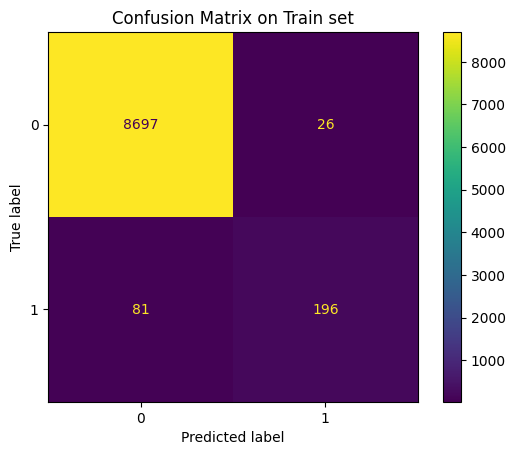

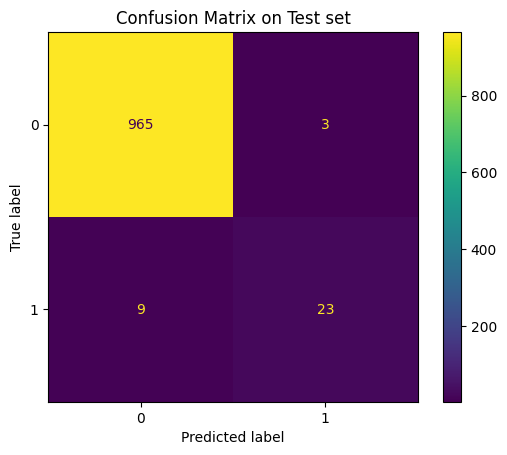

In [241]:
# Visualize confusion matrices
_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Train set")
ConfusionMatrixDisplay.from_estimator(multivariateclassifier, X_train, Y_train, ax=ax)
plt.show()

_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Test set")
ConfusionMatrixDisplay.from_estimator(multivariateclassifier, X_test, Y_test, ax=ax)
plt.show()

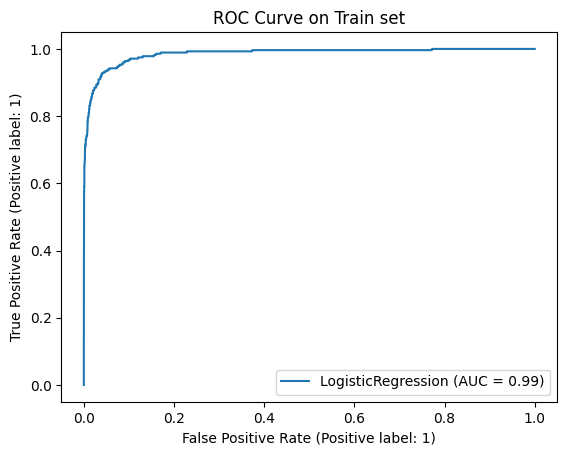

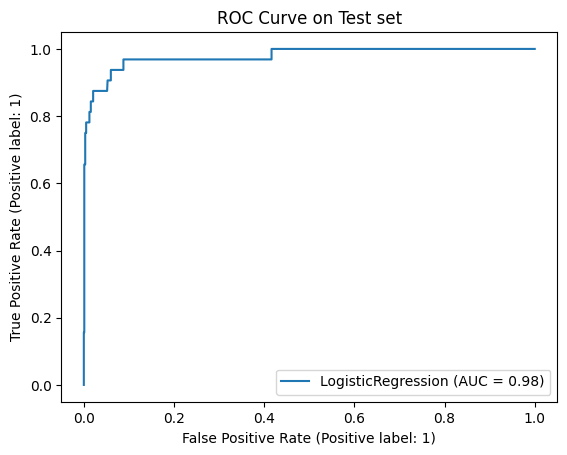

In [242]:
# Visualize ROC curves
_ , ax = plt.subplots() #
ax.set(title="ROC Curve on Train set")
RocCurveDisplay.from_estimator(multivariateclassifier, X_train, Y_train, ax=ax)
plt.show()

_ , ax = plt.subplots()
ax.set(title="ROC Curve on Test set")
RocCurveDisplay.from_estimator(multivariateclassifier, X_test, Y_test, ax=ax)
plt.show()

In [243]:
 # Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

multivariateclassifier.fit(X,Y)

LogisticRegression()

In [244]:
#Using our best model on the data without labels
# Read data without labels
data_without_labels = pd.read_csv('https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/conversion-rate-challenge-ft/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

data_without_labels.head()

Prediction set (without labels) : (31620, 5)


,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [245]:
features_list = ['country',	'age',	'new_user',	'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

#Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [246]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []


for i, t in enumerate(data_without_labels.dtypes):
    if ('float' in str(t)) or ('int' in str(t)):
        numeric_features.append(i)
    else:
        categorical_features.append(i)


print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  [1, 2, 4]
Found categorical features  [0, 3]


In [247]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [248]:
print("Performing preprocessings...")

X_without_labels = preprocessor.fit_transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])


Performing preprocessings...
...Done
[[-0.31512217 -1.47663353  3.33913917  0.          1.          0.
   0.          1.        ]
 [-1.03657046  0.6772161   0.03888347  0.          1.          0.
   1.          0.        ]
 [ 0.16584336  0.6772161  -1.16120951  0.          0.          0.
   0.          1.        ]
 [ 0.16584336  0.6772161   0.33890671  0.          0.          1.
   0.          0.        ]
 [-0.67584631 -1.47663353 -0.56116302  0.          0.          0.
   0.          1.        ]]


In [249]:
multivariateclassifier.predict(X_without_labels)

array([1, 0, 0, ..., 0, 1, 0])

In [250]:
Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.head()

,converted
0,0
1,0
2,1
3,0
4,0


In [251]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': multivariateclassifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)
